# Part 1 - Linear SVM
the specified parameters of SVM: **$C = 10$ **

In [1]:
import numpy as np
from utility import *

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# step 1: data setting(see ./utility.set_positive_and_negative_data())

iris_data = np.loadtxt('../dataset/iris.txt')
iris_data = iris_data[50:]

positive_data, negative_data = set_positive_and_negative_data(iris_data, [2, 3])

In [3]:
# step 2: split the data in training data and test data(see ./utility.get_training_and_test_data())

x_train, x_test, y_train, y_test, y_train_for_plot = get_training_and_test_data(positive_data, negative_data)

In [4]:
# step 3: get alpha and bias(see ./svm.LinearSVM())

from svm import LinearSVM

linear_svm = LinearSVM()
linear_svm.fit(x_train, y_train)

alpha = linear_svm.alpha
bias = linear_svm.bias

print('alpha:')
for index in range(len(alpha)):
    print('    {}'.format(round(alpha[index][0], 4)))

print('bias:\n    {}'.format(bias[0, 0]))

alpha:
    0.0
    0.0
    9.0
    0.0
    0.0
    0.0
    10.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    10.0
    0.0
    9.0
    0.0
    0.0
    0.0
    8.0
    0.0
    0.0
    0.0
    0.0
    10.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    10.0
    0.0
    0.0
    0.0
    10.0
    0.0
bias:
    15.139933904342977


In [5]:
# step 4: get accuracy(see ./svm.LinearSVM().evaluate())

accuracy = linear_svm.evaluate(x_test, y_test)
print('Accuracy is: {}%'.format(accuracy))

Accuracy is: 96.0%


[Text(0, 0.5, 'Feature 4'), Text(0.5, 0, 'Feature 3')]

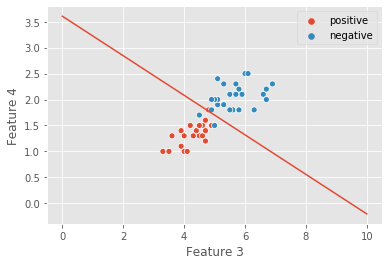

In [6]:
# step 5: plot the feature and hyperplane on plane of feature 3 - feature 4

weight, bias = linear_svm.weight, linear_svm.bias
hyperplane_x, hyperplane_y = linear_svm.get_hyperplane_points(0, 10)

plt.plot(hyperplane_x, hyperplane_y)
sns.scatterplot(x=x_train[:, 0, 0], y=x_train[:, 1, 0], hue=y_train_for_plot).set(xlabel='Feature 3', ylabel='Feature 4')

In [7]:
# step 6, 7: cross validation and average accuracy(see ./utility.cross_validation())

accuracy = cross_validation('linear_svm', x_train, x_test, y_train, y_test, c=10)

print('Average accuracy is: {}%'.format(accuracy))

Average accuracy is: 95.0%


In [8]:
# step 8: modify value of penalty weight C to 100

accuracy = cross_validation('linear_svm', x_train, x_test, y_train, y_test, c=100)

print('When c = 100, average accuray is: {}%'.format(accuracy))

When c = 100, average accuray is: 93.0%
